# Data Prep

## Import Libraries


In [309]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import lightgbm
from lightgbm import LGBMClassifier


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import itertools


RSEED=42

import warnings
warnings.simplefilter('ignore')

## Read the Data

In [310]:
client_train = pd.read_csv('data/client_train.csv', low_memory=False)
invoice_train = pd.read_csv('data/invoice_train.csv', low_memory=False)

client_test = pd.read_csv('data/test/client_test.csv', low_memory=False)
invoice_test = pd.read_csv('data/test/invoice_test.csv', low_memory=False)
sample_submission = pd.read_csv('data/SampleSubmission.csv', low_memory=False)

## Data Understanding

In [311]:
#compare size of the various datasets
print(client_train.shape, invoice_train.shape, client_test.shape, invoice_train.shape)

(135493, 6) (4476749, 16) (58069, 5) (4476749, 16)


In [312]:
#print top rows of dataset
invoice_train.head()

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,train_Client_0,2014-03-24,11,1335667,0,203,8,1,82,0,0,0,14302,14384,4,ELEC
1,train_Client_0,2013-03-29,11,1335667,0,203,6,1,1200,184,0,0,12294,13678,4,ELEC
2,train_Client_0,2015-03-23,11,1335667,0,203,8,1,123,0,0,0,14624,14747,4,ELEC
3,train_Client_0,2015-07-13,11,1335667,0,207,8,1,102,0,0,0,14747,14849,4,ELEC
4,train_Client_0,2016-11-17,11,1335667,0,207,9,1,572,0,0,0,15066,15638,12,ELEC


In [313]:
#print top rows of dataset
client_train.head()

,disrict,client_id,client_catg,region,creation_date,target
0,60,train_Client_0,11,101,31/12/1994,0.0
1,69,train_Client_1,11,107,29/05/2002,0.0
2,62,train_Client_10,11,301,13/03/1986,0.0
3,69,train_Client_100,11,105,11/07/1996,0.0
4,62,train_Client_1000,11,303,14/10/2014,0.0


In [314]:
#Get a summary for all numerical columns
invoice_train.describe()

,tarif_type,counter_number,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number
count,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06
mean,2.012804e+01,1.230587e+11,1.724884e+02,7.321702e+00,1.003040e+00,4.109795e+02,1.093225e+02,2.030620e+01,5.292588e+01,1.776700e+04,1.834970e+04,4.483095e+01
std,1.347256e+01,1.657267e+12,1.338871e+02,1.571654e+00,3.083466e-01,7.573080e+02,1.220123e+03,1.574239e+02,8.754725e+02,4.036693e+04,4.095321e+04,3.128335e+03
min,8.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.100000e+01,1.211080e+05,5.000000e+00,6.000000e+00,1.000000e+00,7.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.791000e+03,2.056000e+03,4.000000e+00
50%,1.100000e+01,4.945610e+05,2.030000e+02,8.000000e+00,1.000000e+00,2.740000e+02,0.000000e+00,0.000000e+00,0.000000e+00,7.690000e+03,8.192000e+03,4.000000e+00
75%,4.000000e+01,1.115161e+06,2.070000e+02,9.000000e+00,1.000000e+00,6.000000e+02,0.000000e+00,0.000000e+00,0.000000e+00,2.166000e+04,2.234300e+04,4.000000e+00
max,4.500000e+01,2.798115e+13,6.000000e+02,4.130000e+02,5.000000e+01,9.999100e+05,9.990730e+05,6.449200e+04,5.479460e+05,2.800280e+06,2.870972e+06,6.366240e+05


In [315]:
#Get a summary for all numerical columns
client_train.describe()

,disrict,client_catg,region,target
count,135493.000000,135493.000000,135493.000000,135493.000000
mean,63.511222,11.512506,206.159809,0.055841
std,3.354400,4.423761,104.207044,0.229614
min,60.000000,11.000000,101.000000,0.000000
25%,62.000000,11.000000,103.000000,0.000000
50%,62.000000,11.000000,107.000000,0.000000
75%,69.000000,11.000000,307.000000,0.000000
max,69.000000,51.000000,399.000000,1.000000


In [316]:
#Get concise information of each column in dataset
invoice_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4476749 entries, 0 to 4476748
Data columns (total 16 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   client_id             object
 1   invoice_date          object
 2   tarif_type            int64 
 3   counter_number        int64 
 4   counter_statue        object
 5   counter_code          int64 
 6   reading_remarque      int64 
 7   counter_coefficient   int64 
 8   consommation_level_1  int64 
 9   consommation_level_2  int64 
 10  consommation_level_3  int64 
 11  consommation_level_4  int64 
 12  old_index             int64 
 13  new_index             int64 
 14  months_number         int64 
 15  counter_type          object
dtypes: int64(12), object(4)
memory usage: 546.5+ MB


In [317]:
#Get concise information of each column in dataset
client_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135493 entries, 0 to 135492
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   disrict        135493 non-null  int64  
 1   client_id      135493 non-null  object 
 2   client_catg    135493 non-null  int64  
 3   region         135493 non-null  int64  
 4   creation_date  135493 non-null  object 
 5   target         135493 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 6.2+ MB


In [318]:
#Getting unique values on the invoice train data
for col in invoice_train.columns:
    print(f"{col} - {invoice_train[col].nunique()}")

client_id - 135493
invoice_date - 8275
tarif_type - 17
counter_number - 201893
counter_statue - 12
counter_code - 42
reading_remarque - 8
counter_coefficient - 16
consommation_level_1 - 8295
consommation_level_2 - 12576
consommation_level_3 - 2253
consommation_level_4 - 12075
old_index - 155648
new_index - 157980
months_number - 1370
counter_type - 2


In [319]:
#Getting unique values on the invoice train data
for col in client_train.columns:
    print(f"{col} - {client_train[col].nunique()}")

disrict - 4
client_id - 135493
client_catg - 3
region - 25
creation_date - 8088
target - 2


In [320]:
#check for missing values
invoice_train.isnull().sum()

client_id               0
invoice_date            0
tarif_type              0
counter_number          0
counter_statue          0
counter_code            0
reading_remarque        0
counter_coefficient     0
consommation_level_1    0
consommation_level_2    0
consommation_level_3    0
consommation_level_4    0
old_index               0
new_index               0
months_number           0
counter_type            0
dtype: int64

In [321]:
#check for missing values
client_train.isnull().sum()

disrict          0
client_id        0
client_catg      0
region           0
creation_date    0
target           0
dtype: int64

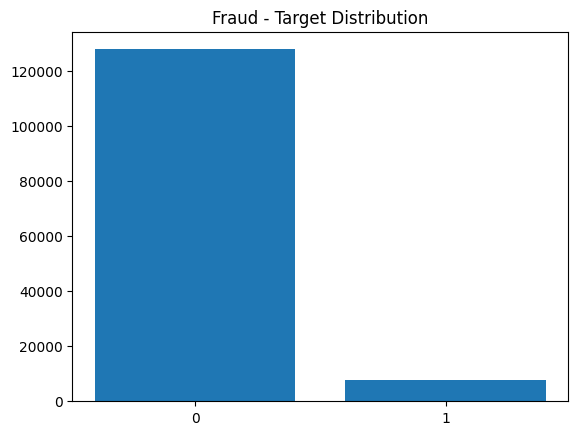

In [322]:
#Visualize fraudulent activities
fraudactivities = client_train.groupby(['target'])['client_id'].count()
plt.bar(x=fraudactivities.index, height=fraudactivities.values, tick_label = [0,1])
plt.title('Fraud - Target Distribution')
plt.show()

In [323]:
client_train[client_train.target == 1].shape[0]

7566

In [324]:
client_train[client_train.target == 1].shape[0]/client_train.shape[0]

0.05584052312665599

## Feature Engineering

In [325]:
#convert the column creation_date to date time format on both the client train and client test
for df in [client_train,client_test]:
    df['creation_date'] = pd.to_datetime(df['creation_date'])

#convert the column invoice_date to date time format on both the invoice train and invoice test
for df in [invoice_train,invoice_test]:
    df['invoice_date'] = pd.to_datetime(df['invoice_date'])

In [326]:
#encode labels in categorical column
d={"ELEC":0,"GAZ":1}
invoice_train['counter_type']=invoice_train['counter_type'].map(d)
invoice_test['counter_type']=invoice_test['counter_type'].map(d)

In [327]:
#convert categorical columns to int for model
client_train['client_catg'] = client_train['client_catg'].astype(int)
client_train['disrict'] = client_train['disrict'].astype(int)

client_test['client_catg'] = client_test['client_catg'].astype(int)
client_test['disrict'] = client_test['disrict'].astype(int)

In [328]:
def aggregate_by_client_id(invoice_data):
    aggs = {}
    aggs['consommation_level_1'] = ['mean']
    aggs['consommation_level_2'] = ['mean']
    aggs['consommation_level_3'] = ['mean']
    aggs['consommation_level_4'] = ['mean']
    aggs['invoice_date'] = ['min','max']
    aggs['months_number'] = ['sum']
    

    agg_trans = invoice_data.groupby(['client_id']).agg(aggs)
    agg_trans.columns = ['_'.join(col).strip() for col in agg_trans.columns.values]
    agg_trans.reset_index(inplace=True)

    df = (invoice_data.groupby('client_id')
            .size()
            .reset_index(name='transactions_count'))
    

    return pd.merge(df, agg_trans, on='client_id', how='left')

In [329]:
# df = (invoice_data.groupby('client_id')
#             .size()
#             .reset_index(name='{}transactions_count'.format('1')))
# df   

In [330]:
#group invoice data by client_id
agg_train = aggregate_by_client_id(invoice_train)

In [335]:
#merge aggregate data with client dataset
train = pd.merge(client_train,agg_train, on='client_id', how='left')
train['date_difference'] = train.invoice_date_max-train.invoice_date_min
train['date_difference']=train.date_difference.dt.total_seconds()/60/60/24
#train['dif_count']=train.date_difference/train.transactions_count
train['creation_maxinv_dif']=(train.invoice_date_max-train.creation_date)
train['months_number_sum'] = train.months_number_sum*30
train['dif_months_n'] = train['months_number_sum'] - train['date_difference']

In [336]:
print(agg_train.shape)
agg_train.head()

(135493, 9)


,client_id,transactions_count,consommation_level_1_mean,consommation_level_2_mean,consommation_level_3_mean,consommation_level_4_mean,invoice_date_min,invoice_date_max,months_number_sum
0,train_Client_0,35,352.400000,10.571429,0.000000,0.000000,2005-10-17,2019-03-19,162
1,train_Client_1,37,557.540541,0.000000,0.000000,0.000000,2005-10-19,2019-04-02,160
2,train_Client_10,18,798.611111,37.888889,0.000000,0.000000,2005-11-10,2019-05-02,116
3,train_Client_100,20,1.200000,0.000000,0.000000,0.000000,2005-06-10,2012-09-25,84
4,train_Client_1000,14,663.714286,104.857143,117.357143,36.714286,2015-02-13,2019-06-17,52


In [337]:
#aggregate test set
agg_test = aggregate_by_client_id(invoice_test)
test = pd.merge(client_test,agg_test, on='client_id', how='left')

In [338]:
train.shape, test.shape

((135493, 17), (58069, 13))

In [339]:
#drop redundant columns
sub_client_id = test['client_id']
drop_columns = ['client_id', 'creation_date']

for col in drop_columns:
    if col in train.columns:
        train.drop([col], axis=1, inplace=True)
    if col in test.columns:
        test.drop([col], axis=1, inplace=True)

In [340]:
train

,disrict,client_catg,region,target,transactions_count,consommation_level_1_mean,consommation_level_2_mean,consommation_level_3_mean,consommation_level_4_mean,invoice_date_min,invoice_date_max,months_number_sum,date_difference,creation_maxinv_dif,dif_months_n
0,60,11,101,0.0,35,352.400000,10.571429,0.000000,0.000000,2005-10-17,2019-03-19,4860,4901.0,8844 days,-41.0
1,69,11,107,0.0,37,557.540541,0.000000,0.000000,0.000000,2005-10-19,2019-04-02,4800,4913.0,6152 days,-113.0
2,62,11,301,0.0,18,798.611111,37.888889,0.000000,0.000000,2005-11-10,2019-05-02,3480,4921.0,12103 days,-1441.0
3,69,11,105,0.0,20,1.200000,0.000000,0.000000,0.000000,2005-06-10,2012-09-25,2520,2664.0,5920 days,-144.0
4,62,11,303,0.0,14,663.714286,104.857143,117.357143,36.714286,2015-02-13,2019-06-17,1560,1585.0,1707 days,-25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135488,62,11,304,0.0,71,1.957746,0.000000,0.000000,0.000000,2005-07-10,2019-06-26,9000,5099.0,5448 days,3901.0
135489,63,11,311,0.0,41,185.853659,0.756098,0.000000,0.000000,2013-02-22,2019-06-18,4800,2307.0,2427 days,2493.0
135490,63,11,311,0.0,36,273.083333,0.000000,0.000000,0.000000,2012-02-15,2019-11-06,4440,2821.0,2906 days,1619.0
135491,60,11,101,0.0,2,300.000000,70.500000,0.000000,0.000000,2005-08-19,2005-12-19,360,122.0,4380 days,238.0


In [ ]:
train[(train.date_difference>199324800000000000)].shape[0]

83329

In [ ]:
train.columns

Index(['disrict', 'client_catg', 'region', 'target', 'transactions_count',
       'consommation_level_1_mean', 'consommation_level_2_mean',
       'consommation_level_3_mean', 'consommation_level_4_mean',
       'invoice_date_min', 'invoice_date_max', 'months_number_sum',
       'date_difference', 'dif_count', 'cr_maxinv_dif'],
      dtype='object')

disrict
client_catg
region
target
transactions_count
consommation_level_1_mean
consommation_level_2_mean
consommation_level_3_mean
consommation_level_4_mean
invoice_date_min
invoice_date_max
date_difference
dif_count
months_number_sum


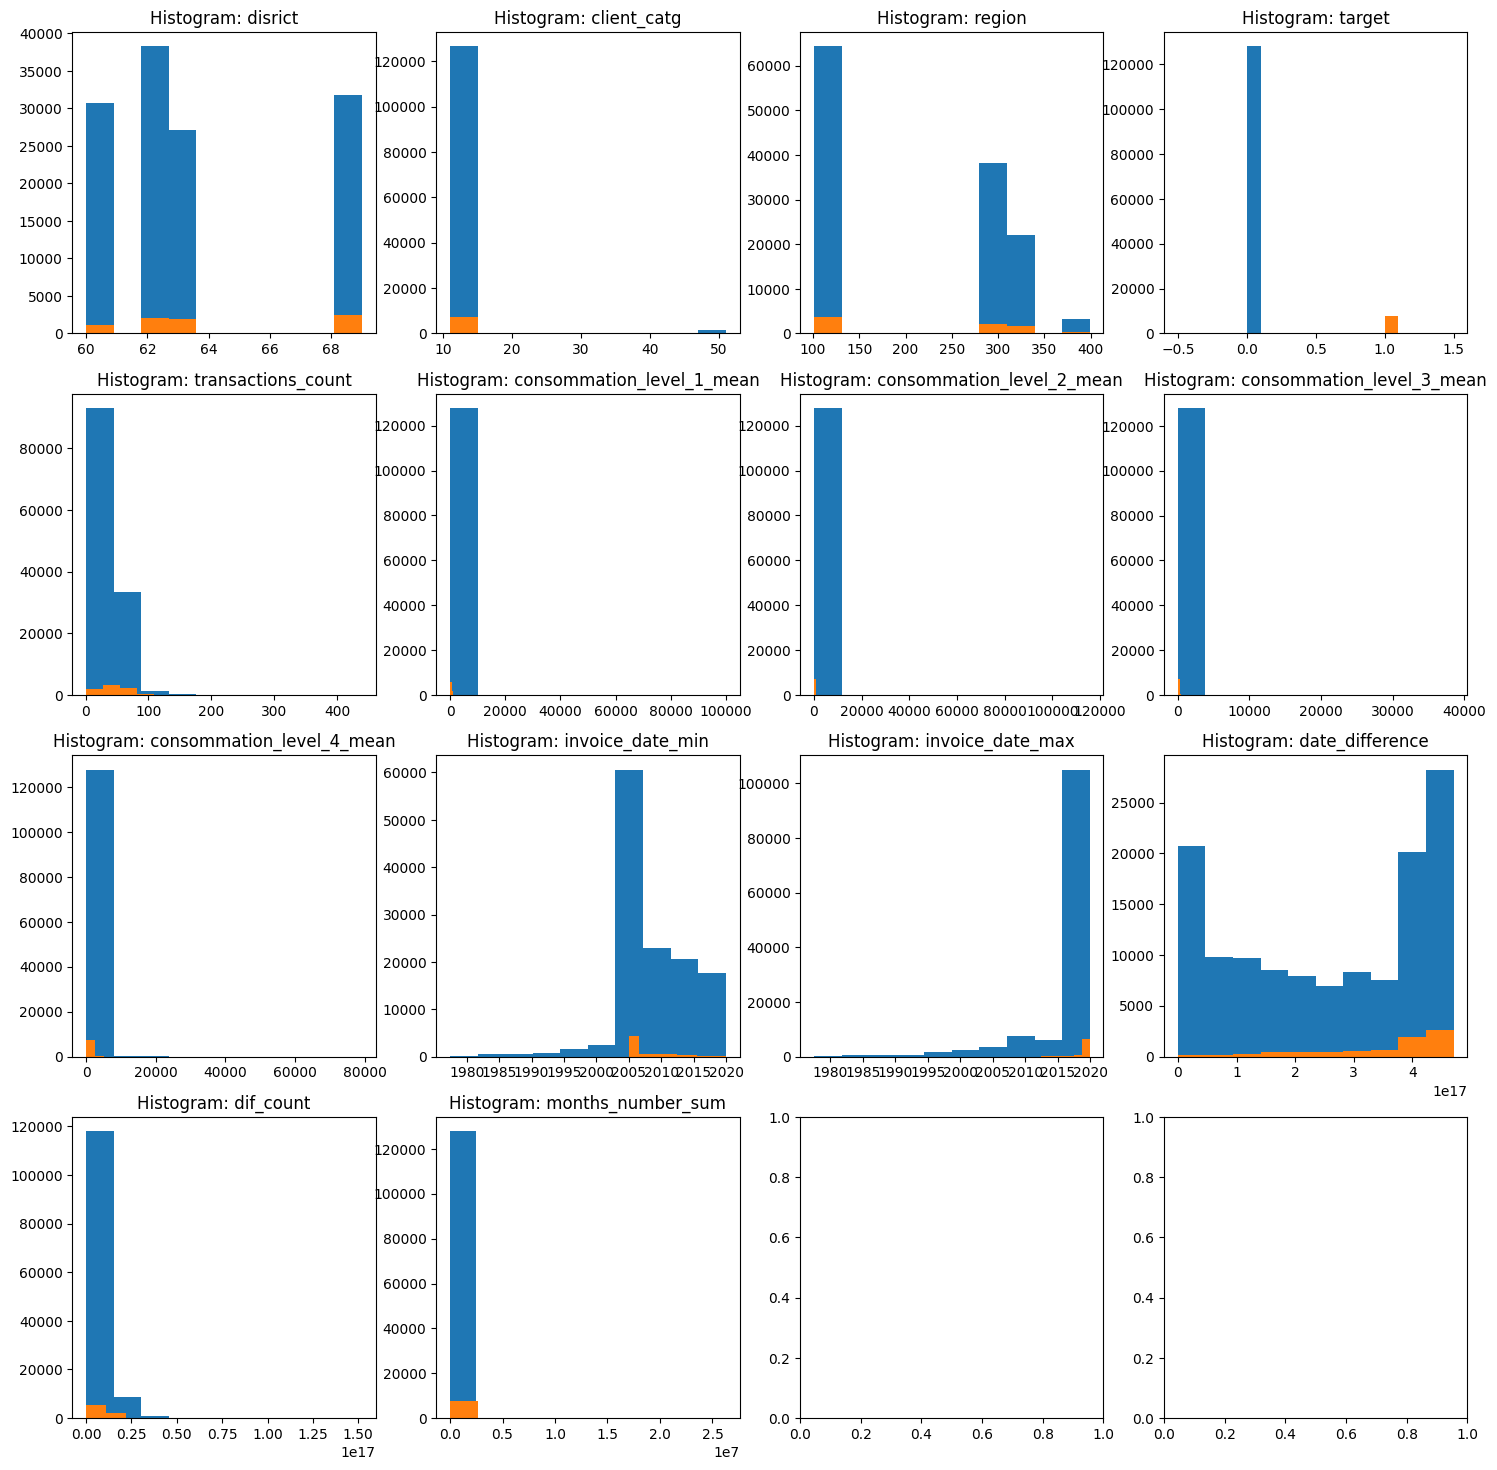

In [ ]:
num_cols = ['disrict', 'client_catg', 'region', 'target', 'transactions_count',
       'consommation_level_1_mean', 'consommation_level_2_mean',
       'consommation_level_3_mean', 'consommation_level_4_mean',
       'invoice_date_min', 'invoice_date_max', 'date_difference','dif_count','months_number_sum']

fig, ax = plt.subplots(4, 4,figsize=(18,18))
ax = ax.ravel()

for i in range(len(num_cols)):
    print(num_cols[i])
    ax[i].set_title('Histogram: ' + num_cols[i])
    ax[i].hist(train.loc[train.target == 0, num_cols[i]])
    ax[i].hist(train.loc[train.target == 1, num_cols[i]])
  
plt.show()

In [ ]:
train.loc[(train.invoice_date_max.dt.year<=2010)&(train.target==1)].shape[0]

6

In [ ]:
#sns.pairplot(data=train[train.target==1])

In [ ]:
train[train.consommation_level_3_mean<=5]

,disrict,client_catg,region,target,transactions_count,consommation_level_1_mean,consommation_level_2_mean,consommation_level_3_mean,consommation_level_4_mean,invoice_date_min,invoice_date_max,months_number_sum,date_difference,dif_count,cr_maxinv_dif
0,60,11,101,0.0,35,352.400000,10.571429,0.000000,0.0,2005-10-17,2019-03-19,162,423446400000000000,1.209847e+16,8844 days
1,69,11,107,0.0,37,557.540541,0.000000,0.000000,0.0,2005-10-19,2019-04-02,160,424483200000000000,1.147252e+16,6152 days
2,62,11,301,0.0,18,798.611111,37.888889,0.000000,0.0,2005-11-10,2019-05-02,116,425174400000000000,2.362080e+16,12103 days
3,69,11,105,0.0,20,1.200000,0.000000,0.000000,0.0,2005-06-10,2012-09-25,84,230169600000000000,1.150848e+16,5920 days
5,69,11,103,0.0,48,352.104167,10.437500,3.770833,0.0,2006-09-13,2019-05-14,192,399686400000000000,8.326800e+15,9358 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135488,62,11,304,0.0,71,1.957746,0.000000,0.000000,0.0,2005-07-10,2019-06-26,300,440553600000000000,6.204980e+15,5448 days
135489,63,11,311,0.0,41,185.853659,0.756098,0.000000,0.0,2013-02-22,2019-06-18,160,199324800000000000,4.861580e+15,2427 days
135490,63,11,311,0.0,36,273.083333,0.000000,0.000000,0.0,2012-02-15,2019-11-06,148,243734400000000000,6.770400e+15,2906 days
135491,60,11,101,0.0,2,300.000000,70.500000,0.000000,0.0,2005-08-19,2005-12-19,12,10540800000000000,5.270400e+15,4380 days


In [ ]:
train.loc[train.target==1,'date_difference'].describe()

count    7.566000e+03
mean     3.450470e+17
std      1.150126e+17
min      0.000000e+00
25%      2.758104e+17
50%      4.084128e+17
75%      4.306824e+17
max      4.701888e+17
Name: date_difference, dtype: float64

In [ ]:
train['date_difference'].describe()

count    1.354930e+05
mean     2.612094e+17
std      1.596738e+17
min      0.000000e+00
25%      1.052352e+17
50%      2.936736e+17
75%      4.202496e+17
max      4.701888e+17
Name: date_difference, dtype: float64

# Modelling

## Train LGBM *Classifier*

In [ ]:
X = train.drop(columns=['target'])
y = train['target']

X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y)

In [ ]:
model = LGBMClassifier(boosting_type='gbdt', num_iterations=500)
model.fit(X_train, y_train)

TypeError: The DType <class 'numpy.dtype[float64]'> could not be promoted by <class 'numpy.dtype[datetime64]'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[datetime64]'>, <class 'numpy.dtype[datetime64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[timedelta64]'>, <class 'numpy.dtype[float32]'>)

## Make Predictions on test set

In [ ]:
X_test.columns

Index(['disrict', 'client_catg', 'region', '1transactions_count',
       'consommation_level_1_mean', 'consommation_level_2_mean',
       'consommation_level_3_mean', 'consommation_level_4_mean'],
      dtype='object')

In [ ]:
preds = model.predict(X_test)
preds = pd.DataFrame(preds, columns=['target'])
preds.head()

,target
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [ ]:
cm = confusion_matrix(y_test, preds)
cm

array([[31920,    62],
       [ 1868,    24]])

In [ ]:
submission = pd.DataFrame(
    {
        'client_id': sub_client_id,
        'target': preds['target']
    }
)

submission.head()

,client_id,target
0,test_Client_0,0.0
1,test_Client_1,0.0
2,test_Client_10,0.0
3,test_Client_100,0.0
4,test_Client_1000,0.0


In [ ]:
# Create the model with 100 trees
model = RandomForestClassifier(n_estimators=100, 
                               random_state=RSEED, 
                               max_features = 'sqrt',
                               n_jobs=-1, verbose = 1)
model.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.6s finished


RandomForestClassifier(n_jobs=-1, random_state=42, verbose=1)

In [ ]:
preds = model.predict(X_test)
cm = confusion_matrix(y_test, preds)
cm

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished


array([[31873,   109],
       [ 1870,    22]])

## Class Weight

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
model = RandomForestClassifier(class_weight=dict(enumerate(class_weights)),n_estimators=100, 
                               random_state=RSEED, 
                               max_features = 'sqrt',
                               n_jobs=-1, verbose = 1)

model.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.5s finished


RandomForestClassifier(class_weight={0: 0.52957155252605, 1: 8.9540708432461},
                       n_jobs=-1, random_state=42, verbose=1)

In [ ]:
preds = model.predict(X_test)
cm = confusion_matrix(y_test, preds)
cm

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished


array([[31859,   123],
       [ 1876,    16]])

### RandomOverSampler

In [ ]:
#!pip install imblearn

In [ ]:
from imblearn.over_sampling import RandomOverSampler

#RandomOverSampler
ros = RandomOverSampler()

X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
print(X_train.shape, y_train.shape, X_resampled.shape, y_resampled.shape)

(101619, 8) (101619,) (191890, 8) (191890,)


In [ ]:
#X_train,X_test,y_train,y_test = train_test_split(X_resampled, y_resampled,stratify=y_resampled)
model = LGBMClassifier(boosting_type='gbdt', num_iterations=500)
model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 5674, number of negative: 95945
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001788 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1252
[LightGBM] [Info] Number of data points in the train set: 101619, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.055836 -> initscore=-2.827881
[LightGBM] [Info] Start training from score -2.827881


LGBMClassifier(num_iterations=500)

In [ ]:
preds = model.predict(X_test)
cm = confusion_matrix(y_test, preds)
cm

array([[31920,    62],
       [ 1868,    24]])

In [ ]:
model = RandomForestClassifier(n_estimators=100, 
                               random_state=RSEED, 
                               max_features = 'sqrt',
                               n_jobs=-1, verbose = 1)

model.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.6s finished


RandomForestClassifier(n_jobs=-1, random_state=42, verbose=1)

In [ ]:
preds = model.predict(X_test)
cm = confusion_matrix(y_test, preds)
cm

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished


array([[31873,   109],
       [ 1870,    22]])

In [ ]:
from imblearn.over_sampling import SMOTE

# SMOTE
smote = SMOTE()

X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
print(X_train.shape, y_train.shape, X_resampled.shape, y_resampled.shape)

(101619, 8) (101619,) (191890, 8) (191890,)


In [ ]:
#X_train,X_test,y_train,y_test = train_test_split(X_resampled, y_resampled,stratify=y_resampled)
model = LGBMClassifier(boosting_type='gbdt', num_iterations=500)
model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 5674, number of negative: 95945
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001443 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1252
[LightGBM] [Info] Number of data points in the train set: 101619, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.055836 -> initscore=-2.827881
[LightGBM] [Info] Start training from score -2.827881


LGBMClassifier(num_iterations=500)

In [ ]:
preds = model.predict(X_test)
cm = confusion_matrix(y_test, preds)
cm

array([[31920,    62],
       [ 1868,    24]])

In [ ]:
model = RandomForestClassifier(n_estimators=100, 
                               random_state=RSEED, 
                               max_features = 'sqrt',
                               n_jobs=-1, verbose = 1)

model.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.7s finished


RandomForestClassifier(n_jobs=-1, random_state=42, verbose=1)

In [ ]:
preds = model.predict(X_test)
cm = confusion_matrix(y_test, preds)
cm

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished


array([[31873,   109],
       [ 1870,    22]])

In [ ]:
from imblearn.over_sampling import ADASYN

# ADASYN
adasyn = ADASYN()

X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)

In [ ]:
#X_train,X_test,y_train,y_test = train_test_split(X_resampled, y_resampled,stratify=y_resampled)
model = LGBMClassifier(boosting_type='gbdt', num_iterations=500)
model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 5674, number of negative: 95945
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001717 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1252
[LightGBM] [Info] Number of data points in the train set: 101619, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.055836 -> initscore=-2.827881
[LightGBM] [Info] Start training from score -2.827881


LGBMClassifier(num_iterations=500)

In [ ]:
preds = model.predict(X_test)
cm = confusion_matrix(y_test, preds)
cm

array([[31920,    62],
       [ 1868,    24]])

In [ ]:
model = RandomForestClassifier(n_estimators=100, 
                               random_state=RSEED, 
                               max_features = 'sqrt',
                               n_jobs=-1, verbose = 1)

model.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.6s finished


RandomForestClassifier(n_jobs=-1, random_state=42, verbose=1)

In [ ]:
preds = model.predict(X_test)
cm = confusion_matrix(y_test, preds)
cm

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished


array([[31873,   109],
       [ 1870,    22]])